In [1]:
# SVM
# Supports both regression and classification
# can also be used for image analysis or recognition
# We will allow more bias to get more better results in future if some data pount is misclassified
# Distance between threshold and observation is soft margin and it allows misclassification inside margin
# use cv to determine the optimal size of the model
# In maximum margin classifier there will be too much variance but the data will not have any misclassification and bias will be very low
# So we will use Support vector classfier(Soft margin) to add bias and allow misclassification of some points
# Where hyperplane performs poorly even if we allow alot many misclassification
# like one class in between surrounded by the other class on both sides
# Here we need to go for support vector machine when it can't be solved even with soft margin
# We do this by using kernel by moving to higher dimension to seperate the data
# Project the points in 2d using polynomial kernel
# 2d to 3d and seperating it through hyperplane
# kernel trick uses dot product of transpositon of data and avoids recomuting the points

# Kernel Trick

In [2]:
# max amrgin classifier
# Maximise the margin we need to find the Beta coefficient subject to no point in the margin and are on correct side of class
# if Sum of Beta square=1 calculates the orthogonal distance of the points from hyper plane
# SVC
# allows some misclassification
# error is related to C which tells how many error can be forgiven(C calculated using cross validation)
# axxording to maths increasing C increase num of miss classification you allow
# but in sckit learn inversely proportional to mathematical equation(because regularization is consistent over all models)
# SVM
# polynomial square,here also misclassification is allowed coeff increases epsilon comes from C

In [3]:
# As we move to large feature space the computation increase
# It is done by kernel trick
# sum of subcomponents(a1b1+a2b2) or magnitude(ab)cos*theta
# calculate inner product for all pairs of training obs  (alpha is non-zero for support vector)
# L148 for formulas
# /kernel f=gives measure of similarit between original and enlarger feature space

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('../DATA/mouse_viral_study.csv')

In [6]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

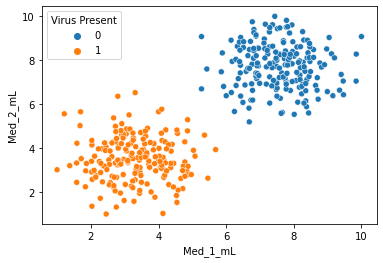

In [7]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

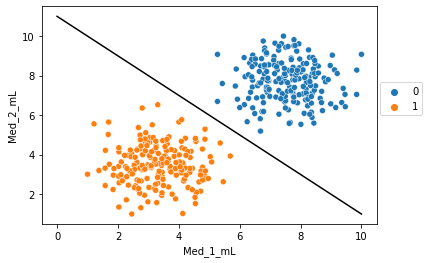

In [8]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)
# Hyperplane creating it manually
x=np.linspace(0,10,100)
m=-1
b=11
y=m*x+b
plt.plot(x,y,'black')
plt.legend(loc=(1.01,0.5))

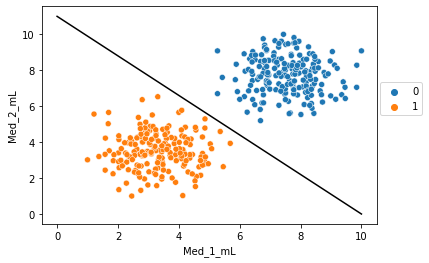

In [9]:
# Changing slope
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)
# Hyperplane creating it manually
x=np.linspace(0,10,100)
m=-1.1
b=11
y=m*x+b
plt.plot(x,y,'black')
plt.legend(loc=(1.01,0.5))

In [10]:
# Finding best possible  hyperplane
from sklearn.svm import SVC

In [11]:
help(SVC)
#  C=1.0, kernel='rbf', degree=3, gamma='scale'

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [12]:
y=df['Virus Present']

In [13]:
X=df.drop('Virus Present',axis=1)

In [14]:
# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
model=SVC(kernel='linear',C=1000)

In [15]:
# C is how many points we allow in margin(inversely proportional in sckit learn)
# C is high then very less points allowed in margin
# C is regularisation parameter
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [16]:
# file present with the function
from svm_margin_plot import plot_svm_boundary

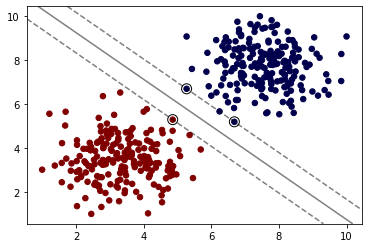

In [17]:
plot_svm_boundary(model,X,y)

In [18]:
# Hyper parameter tuning
model=SVC(kernel='linear',C=0.005)
model.fit(X,y)

SVC(C=0.005, kernel='linear')

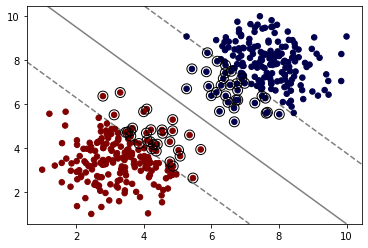

In [19]:
# difference when c is very small
# very soft margin
plot_svm_boundary(model,X,y)

In [20]:
# Cross validation for best optimal c value

In [21]:
# default is rbf
model=SVC(kernel='rbf',C=1)
model.fit(X,y)

SVC(C=1)

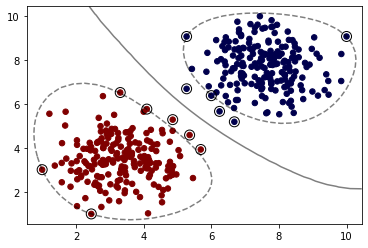

In [22]:
plot_svm_boundary(model,X,y)

In [23]:
# If we make c more lower we allow more points between margin and hyperplane
model=SVC(kernel='rbf',C=.1)
model.fit(X,y)

SVC(C=0.1)

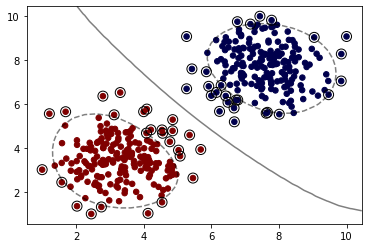

In [24]:
plot_svm_boundary(model,X,y)

In [25]:
# gamma : {'scale', 'auto'} or float, default='scale'
model=SVC(kernel='rbf',C=1,gamma='auto')
model.fit(X,y)

SVC(C=1, gamma='auto')

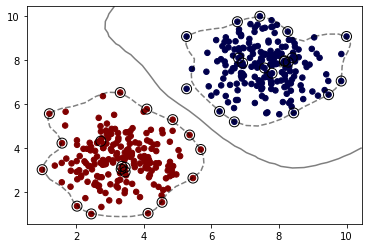

In [26]:
plot_svm_boundary(model,X,y)
# lot more noise
# gamma defines how much influence a single training example has

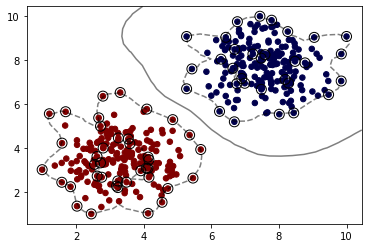

In [27]:
# gamma as it becomes larger it fits more to the support vectors
# gamma=0.5 is default
model=SVC(kernel='rbf',C=1,gamma=0.9)
model.fit(X,y)
plot_svm_boundary(model,X,y)

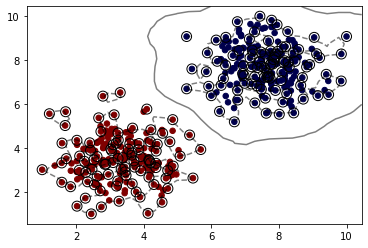

In [28]:
# overfitting to data
model=SVC(kernel='rbf',C=1,gamma=3)
model.fit(X,y)
plot_svm_boundary(model,X,y)

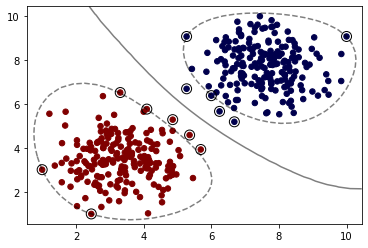

In [29]:
# good choice with bias variance trade off
model=SVC(kernel='rbf',C=1,gamma='scale')
model.fit(X,y)
plot_svm_boundary(model,X,y)

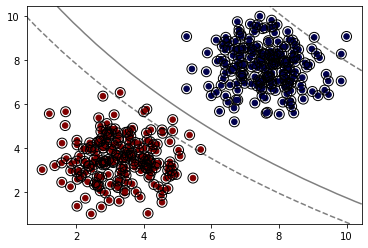

In [30]:
# not suitable for this dataset
# but can be a option incross validation
model=SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)
# all points are highlighted as support vectors

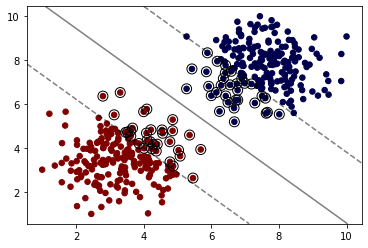

In [31]:
# looks like linear
model=SVC(kernel='poly',degree=1,C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

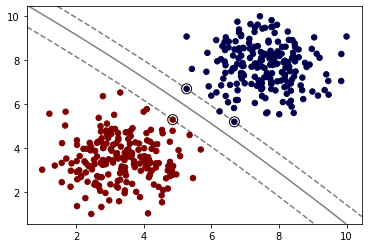

In [32]:
# starts to curvewith high degree
model=SVC(kernel='poly',degree=4,C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [33]:
# for good kernel and c value
from sklearn.model_selection import GridSearchCV

In [34]:
svm=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [35]:
grid=GridSearchCV(svm,param_grid)

In [36]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [37]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

### SVM Regression

In [38]:
fd=pd.read_csv('../DATA/cement_slump.csv')

In [39]:
fd

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


<AxesSubplot:>

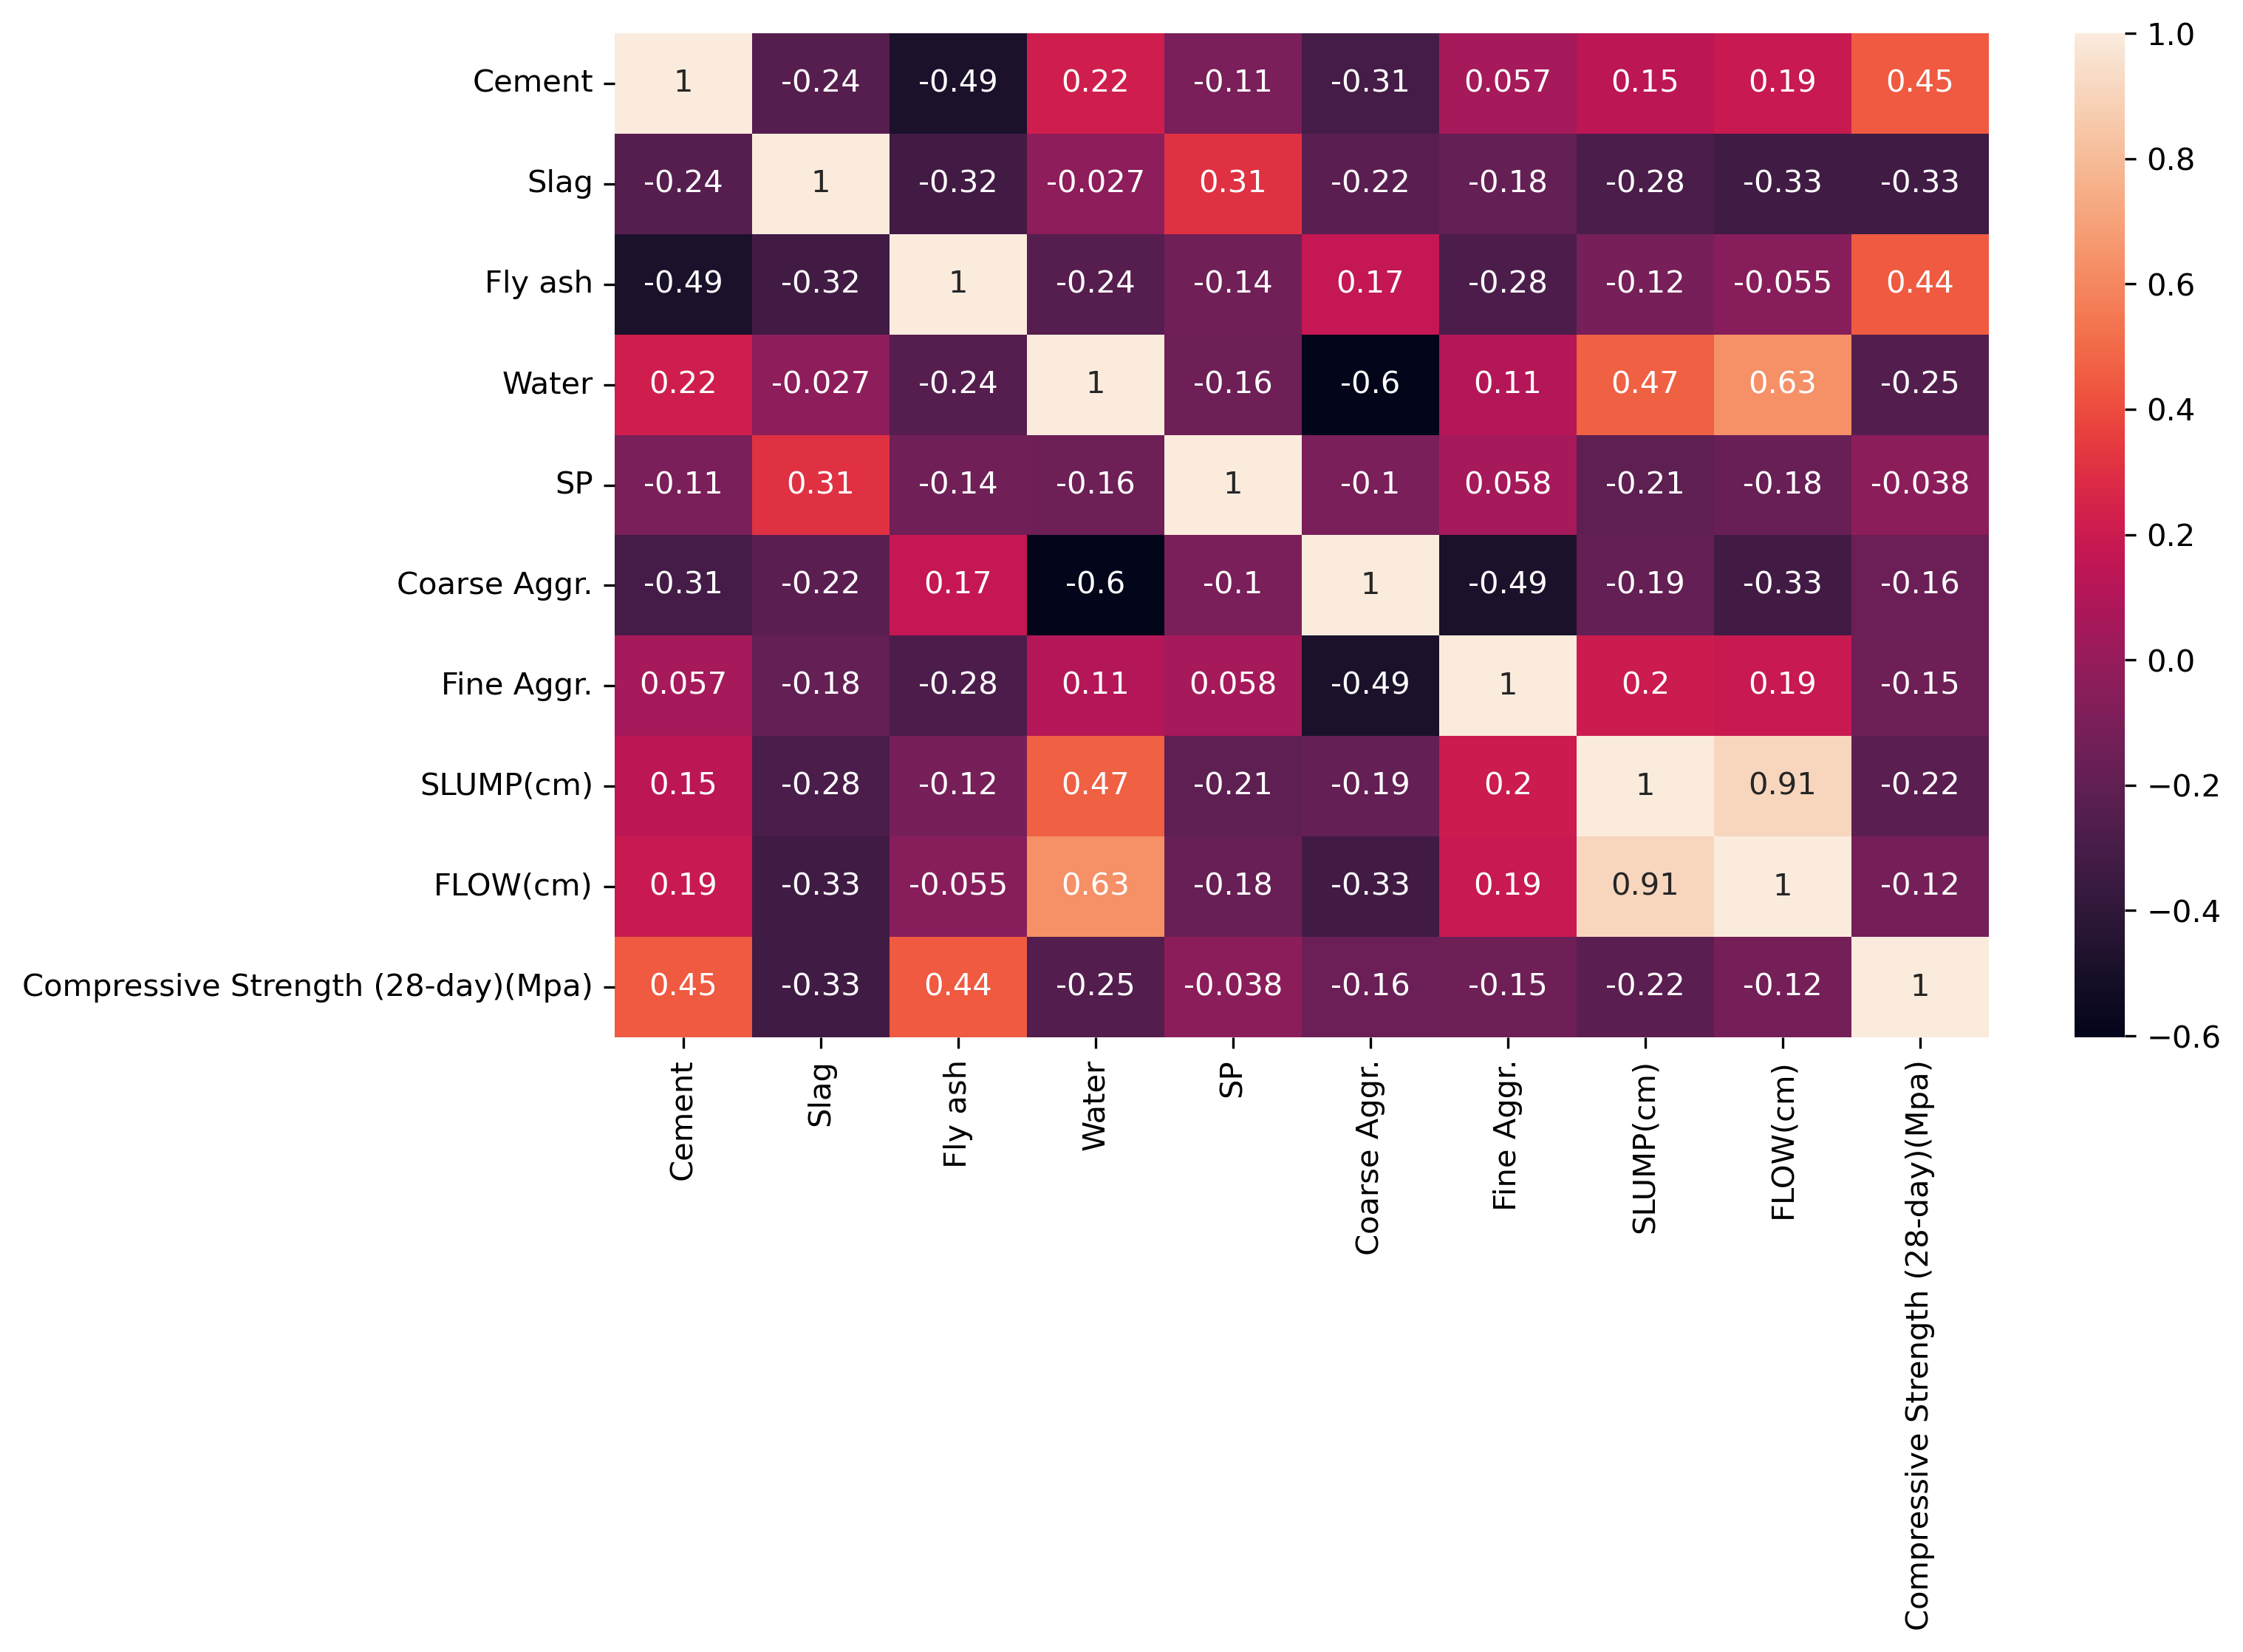

In [40]:
plt.figure(figsize=(10,6),dpi=300)
sns.heatmap(fd.corr(),annot=True)

In [41]:
fd.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [42]:
X=fd.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [43]:
y=fd['Compressive Strength (28-day)(Mpa)']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
X_train=scaler.fit_transform(X_train)

In [49]:
X_test=scaler.transform(X_test)

In [50]:
from sklearn.svm import SVR,LinearSVR
# if we know that we have to use linear kernel it makes the process faster

In [51]:
help(SVR)
# cross valid or grid search for best parameter

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies th

In [52]:
base_model=SVR()

In [53]:
base_model.fit(X_train,y_train)

SVR()

In [54]:
base_pred=base_model.predict(X_test)

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [56]:
mean_absolute_error(y_test,base_pred)

5.236902091259179

In [57]:
import math

In [59]:
np.sqrt(mean_squared_error(y_test,base_pred))

6.695914838327133

In [60]:
y_test.mean()

36.26870967741935

In [61]:
# epsilon the amount of error we allow
param_grid={'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','polynomial']
           ,'gamma':['scale','auto','epsilon']
           ,'degree':[2,3,4],'epsilon':[0,0.01,0.1,0.5,1,2]}

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
svr=SVR()

In [64]:
grid=GridSearchCV(svr,param_grid)

In [65]:
grid.fit(X_train,y_train)

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'epsilon' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-p

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFa

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto', 'epsilon'],
                         'kernel': ['linear', 'rbf', 'polynomial']})

In [66]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [68]:
grid_pred=grid.predict(X_test)

In [69]:
mean_absolute_error(y_test,grid_pred)

2.512801221076198

In [70]:
np.sqrt(mean_squared_error(y_test,grid_pred))

3.1782103051198347